In [85]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

In [86]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!
UnitRadius_in_cm = 9.2e16  #!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!!
UnitDensity_in_cgs = UnitMass_in_g / UnitRadius_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')

G = 6.6738e-8
rgas = 9.2e16                                     # The initial radius of the cloud in cm
rho0 = 6.02e-19                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitTime_in_s = tff                               # Scaling time to free-fall time
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')

UnitDensity_in_cgs = 2.555477932111449e-18 g/cm^3
unitVelocity_in_cm_per_s = 33979.12 cm/s


In [87]:
NN = 7500
j = 1444
filz = np.sort(glob.glob('/mnt/Linux_Shared_Folder_2022/Output_21_August/*.pkl'))

#NN = 10
#j = 938
#filz = np.sort(glob.glob('./Outputs_27k_beta_0.01/*.pkl'))

with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
rho = data['rho']

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

## Selecting particles in a thin shell parallel to the x-y plane

# delta = 0.01

# nz = np.where((z >= -delta) & (z <= delta))[0]
# print(len(nz))

# x = x[nz]
# y = y[nz]
# z = z[nz]

# v = v[nz] * unitVelocity_in_cm_per_s

rho =  [2.91555652e-23 3.06293431e-23 3.18366443e-23 ... 9.71665380e-14
 9.91648443e-14 1.00242335e-13]


(-1.0, 1.0)

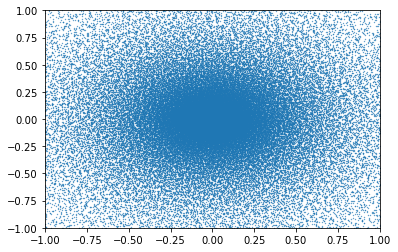

In [88]:
plt.scatter(x, z, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [89]:
vx = v[:, 0]
vy = v[:, 1]
vz = v[:, 2]

res = []

for i in range(len(x)):
    
    d = (x[i]*x[i] + y[i]*y[i])**0.5

    Jt = x[i]*vy[i] - y[i]*vx[i]

    res.append([d, Jt/d])

res = np.array(res)

d = res[:, 0] * unitLength_in_cm
jt_d = res[:, 1] 

print('Done !!!')

Done !!!


(13.0, 18.0)

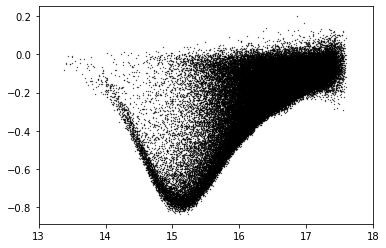

In [90]:
plt.scatter(np.log10(d), -jt_d, s = 0.1, color = 'k')
plt.xlim(13, 18)

In [91]:
xgrid = np.linspace(13, 18, 40)

new_res = []

for i in range(len(xgrid)-1):
    
    ntmp = np.where((np.log10(d) >= xgrid[i]) & (np.log10(d) < xgrid[i+1]))[0]
    jt_new = np.mean(jt_d[ntmp])
    
    new_res.append([xgrid[i], jt_new])

new_res = np.array(new_res)

new_res = new_res[3:-4] # removing NaNs from the top and bottom of the array.

XX = new_res[:, 0]
YY = new_res[:, 1]

print(new_res)

/home/pc/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pc/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[13.38461538  0.03312189]
 [13.51282051  0.04958113]
 [13.64102564  0.09098018]
 [13.76923077  0.12555005]
 [13.8974359   0.1458012 ]
 [14.02564103  0.18976138]
 [14.15384615  0.24987491]
 [14.28205128  0.32930302]
 [14.41025641  0.42065055]
 [14.53846154  0.49093326]
 [14.66666667  0.55023441]
 [14.79487179  0.59947179]
 [14.92307692  0.6055259 ]
 [15.05128205  0.596823  ]
 [15.17948718  0.5664913 ]
 [15.30769231  0.51915646]
 [15.43589744  0.46844881]
 [15.56410256  0.40820869]
 [15.69230769  0.36253526]
 [15.82051282  0.32115964]
 [15.94871795  0.28912705]
 [16.07692308  0.26010279]
 [16.20512821  0.23409588]
 [16.33333333  0.21079999]
 [16.46153846  0.18769454]
 [16.58974359  0.16714694]
 [16.71794872  0.14754531]
 [16.84615385  0.12826871]
 [16.97435897  0.10954152]
 [17.1025641   0.09211493]
 [17.23076923  0.07605872]
 [17.35897436  0.05927977]]


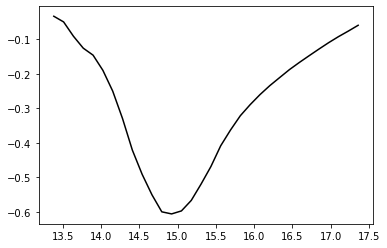

In [92]:
plt.plot(XX, -YY, color = 'k')

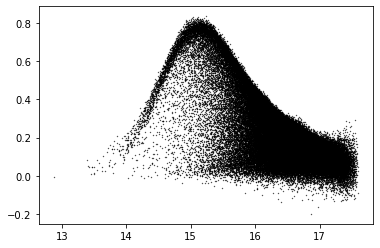

In [78]:
plt.scatter(np.log10(d), jt_d, s = 0.1, color = 'k')

In [81]:
NN = 10
j = 1
filz = np.sort(glob.glob('./Outputs_10k_beta_0.01/*.pkl'))

with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
rho = data['rho']

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

## Selecting particles in a thin shell parallel to the x-y plane

# delta = 0.05

# nz = np.where((z >= -delta) & (z <= delta))[0]
# print(len(nz))

# x = x[nz]
# y = y[nz]
# z = z[nz]

# v = v[nz] * unitVelocity_in_cm_per_s

rho =  [2.52149963e-19 2.55984445e-19 2.57326428e-19 ... 7.81179208e-19
 7.83612296e-19 7.98841457e-19]


Done !!!


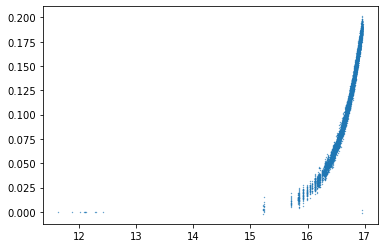

In [82]:
vx = v[:, 0]
vy = v[:, 1]
vz = v[:, 2]

res = []

for i in range(len(x)):
    
    d = (x[i]*x[i] + y[i]*y[i])**0.5

    Jt = x[i]*vy[i] - y[i]*vx[i]

    res.append([d, Jt/d])

res = np.array(res)

d = res[:, 0] * unitLength_in_cm
jt_d = res[:, 1] 

plt.scatter(np.log10(d), jt_d, s = 0.1)

print('Done !!!')